<h1><center>US House Price Prediction</center></h1>

**PROBLEM:**
- Due to the government's inefficiency in  collecting quality data there has been a technological and monetary loss in the industry. There has always been a need for a strong prediction tool that can be utilised by financial institutions for predicting the house prices. This will directly help them in predicting the valuation of the real estates, assigning optimal mortgage rates and accounting purposes. But the data insufficiency has always been the problem.

**OUR OBJECTIVE:**
- To create a Machine Learning based prediction model which can make use of publicly accessible data of all the factors that affects the US House Price. To help the financial institution in predicting the house prices for future valuation and accounting.

**Our aim is to create a model which can predict the US Real Estate prices using advanced Machine Learning algorithms. We will start with  regression techniques along with regularization such as Ridge and Lasso to try to improve our prediction accuracy.**

---

# Import Libraries

In [36]:
## Importing all required libraries...

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

# Load data

In [37]:
df = pd.read_csv('KeggleHousePrices_train.csv')
print("Dimensions of the data set are:" , df.shape)

Dimensions of the data set are: (1460, 81)


# Explore and clean data

In [38]:
## Let's check our data set...
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Let's begin by looking at different features in the dataset:


In [103]:
df.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LogOfPrice
count,1094.000000,1094.000000,1094,1094.000000,1094.000000,1094,1094,1094,1094,1094,...,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094,1094,1094.000000
unique,NaN,NaN,5,NaN,NaN,2,4,4,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,850,NaN,NaN,1090,760,991,1094,830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,928,880,NaN
mean,727.375686,56.128885,NaN,70.759598,10132.346435,NaN,NaN,NaN,NaN,NaN,...,22.053016,3.266910,16.498172,3.007313,23.550274,6.335466,2007.786106,NaN,NaN,12.057513
std,420.955488,41.976345,NaN,24.508859,8212.249621,NaN,NaN,NaN,NaN,NaN,...,61.570502,29.655973,58.455303,40.713175,167.135237,2.694558,1.334307,NaN,NaN,0.394847
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,NaN,NaN,10.471950
25%,366.500000,20.000000,NaN,60.000000,7606.750000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,NaN,NaN,11.794338
50%,723.500000,50.000000,NaN,70.000000,9444.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,NaN,NaN,12.018235
75%,1093.750000,70.000000,NaN,80.000000,11387.250000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,NaN,NaN,12.305918


#### We can see some features are numeric while others are text. There are also missing values in the dataset.

In [40]:
# Find columns with missing values and their percent missing
miss_val = df.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

# Add a new column to the dataframe and fill it with the percentage of missing values
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df.shape[0] * 100)) 
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val

,MissvalCount,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


**We'll remove those features with a high percent of missing values such as PoolQC, MiscFeature, Alley, Fence, and FireplaceQu. Note that the LotFrontage feature has only 16% missing. This is relatively low so we can choose to replace the NaN values with the imputed mean of the column. We will remove the remainder rows with missing values.**

In [41]:
## drop columns with high missing values...
df = df.drop(['Fence', 'MiscFeature', 'PoolQC','FireplaceQu','Alley'], axis=1)

# drop rows with any missing values
df.dropna(inplace=True)

In [42]:
# Check the dimension of the dataset
df.shape

(1094, 76)

#### The dataset is cleaned. It now has 1094 observations and 76 features. 
---

# Exploratory Data Analysis:

Let's examine the data distributions of the features. We will start with the target variable, SalesPrice, to make sure it's normal distributed. This is important because most machine learning algorithms make the assumption that the data is normal distributed. When data fits a normal distribution, we can make statements about the population using analytical techniques. 

### Sales Price:

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

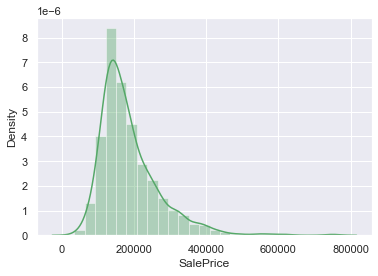

In [43]:
## Checking the distribution of target variable...
sns.distplot(df.SalePrice , bins = 25 , color = 'g')

#### We can see the SalePrice distribution is skewed to the right. Let's transform it so that it follows a Gaussian Normal Distribution.

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

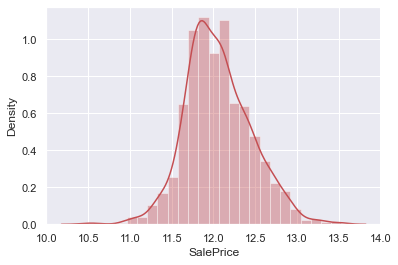

In [44]:
## Transforming the target variable...
sns.distplot(np.log(df.SalePrice) , bins = 25 , color = 'r')

#### The data is now more normal distributed. We will use this transformed data in the dataframe and remove the skewed distribution:

In [45]:
## Making changes to the original dataset...
df['LogOfPrice'] = np.log(df.SalePrice)
## Dropping the skewed feature...
df.drop(["SalePrice"], axis=1, inplace=True)

#### Let's check the skewness of the input features:

In [101]:
## Reviewing the skewness of each feature...
df.skew().sort_values(ascending=False).head(10)

LotArea          15.508309
PoolArea         13.614615
3SsnPorch        11.069793
LowQualFinSF      9.896145
MiscVal           9.673292
KitchenAbvGr      5.587741
BsmtFinSF2        4.372440
BsmtHalfBath      4.049639
ScreenPorch       3.962075
EnclosedPorch     3.165433
dtype: float64

**NOTE:** 
- Values closer to zero are less skewed. The results show some features having a positive (right-tailed) or negative (left-tailed) skew. 
- We can see YearBuilt is slightly skewed to the left but pretty much normal distributed while LotArea and PoolArea are highly skewed to the right. 
- Highly skewed distributions in the dataset may benefit from data transforms in some way to improve our prediction accuracy.
---

# Setting the target and independent features:

In [87]:
## Setting the target...
y = df['LogOfPrice']

# Using only those input features with numeric data type...
df_temp = df.select_dtypes(include=["int64","float64"]) 
## Setting the group of independent features...
X = df_temp.drop(["LogOfPrice" , "Id"],axis=1)

# Data Scaling and Preprocessing:

- The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.
- In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).
- Given the distribution of the feature, each value of the feature will have the mean value subtracted, and then divided by the standard deviation of that feature.

In [88]:
from sklearn.preprocessing import StandardScaler

## Creating an object for scaling the data... 
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.fit_transform(X)

# Train-Test Split dataset:

Before we can start modeling the data, we need to split the dataset into training and test sets. We will train the models with the training set and check its significance using the test set.<br><br>
**NOTE:** In the dataset we have lots of features in the dataset that are text. Most machine learning models require numerical input features. Since the process of converting text features to a numeric representation involves NLP, for now we will only use the numeric features in our price prediction.

**Spliting the dataset, we will use random sampling with 75/25 train-test split; i.e. we'll use 75% of the dataset for training and rest 25% for testing.**

In [89]:
## Split the dataset into train and test sets...
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = .25, random_state = 45)

---
# Modeling

Now let's build four different models and evaluate their performances with R-squared metric. Additionally, here we'll gain insights on the features that are strong predictors of US house prices.

## Linear Regression:

In [90]:
reg = LinearRegression()
## fitting the optimal linear regression line on training dats...
## Here we'll utilise gradient descent...
reg.fit(X_train, y_train)

LinearRegression()

In [91]:
## Using our model to predict y_values for corresponding X_test...
yr_hat = reg.predict(X_test)

In [92]:
## evaluating the algorithm with a test set... 
reg_score = reg.score(X_test, y_test) 
print("Test Accuracy of Linear Regression Model: ", reg_score)

Test Accuracy of Linear Regression Model:  0.8585712919257982


**Let's see how well the train-test split method performed. We will do cross-validation to see whether the model is over-fitting the data:**

In [93]:
## Applying cross validation technique to find 'validate' score across multiple samples, automatically does Kfold stratifying...
reg_cv = cross_val_score(reg, X, y, cv = 5, scoring= 'r2')
print("Cross Validation results: ", reg_cv)
print("R2 Score: ", reg_cv.mean())

Cross Validation results:  [0.88446297 0.83651368 0.86153178 0.89210439 0.61682711]
R2 Score:  0.8182879866595412


- It doesn't appear that for this train-test dataset, the model is not over-fitting the data (the cross-validation performance is very close in value). It may be a slightly over-fitted but we can't really tell by the R-squared metric alone. 
- If it is over-fitted, we can do some data transforms or feature engineering to improve its performance. But our main objective initially is to spot-check a few algorithms and fine tune the model later on. 
---

**NOTE: To help prevent over-fitting in simple linear regression, we can use regression models with regularization techniques. Let's look at Ridge and Lasso Regression.**

## What is Regularization?


**The alpha parameter in ridge and lasso regularizes the regression model.**
- The regression algorithms with regularization differ from linear regression in that they try to penalize those features that are not significant in our prediction. Ridge will try to reduce their effects (i.e., shrink their coeffients) in order to optimize all the input features. 
- Lasso will try to remove the not-significant features by making their coefficients zero. In short, Lasso (L1 regularization) can eliminate the not-significant features, thus performing feature selection while Ridge (L2 regularization) cannot.   

## 1. Ridge Regression

In [94]:
## Creating an object for Ridge regression and setting alpha to a default value as baseline...
ridge = Ridge(alpha = 1)  
ridge.fit(X_train, y_train)

ridge_cv = cross_val_score(ridge, X, y, cv = 5, scoring = 'r2')
print ("Cross Validation results: ", ridge_cv)
print ("R2 Score: ", ridge_cv.mean())

Cross Validation results:  [0.88448607 0.83650938 0.86152566 0.89226222 0.61697296]
R2 Score:  0.8183512582932988


## 2. Lasso Regression

In [95]:
## Creating an object for Lasso regression and setting alpha to a default value as baseline...
lasso = Lasso(alpha = .001) 
lasso.fit(X_train, y_train)

lasso_cv = cross_val_score(lasso, X, y, cv = 5, scoring = 'r2')
print ("Cross-validation results: ", lasso_cv)
print ("R2: ", lasso_cv.mean())

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0125210141787377, tolerance: 0.013611034250157875
  positive)


Cross-validation results:  [0.88497685 0.83524498 0.85976896 0.89334727 0.61238746]
R2:  0.8171451046697467


**NOTE:** Alpha is the regularization parameter. The alpha values choosen for ridge and lasso serve as a starting point and are not likely the best. To determine the best alpha for the model, we can use GridSearch. We would feed GridSearch a range of alpha values and it will try them all in cross-validation to output the best one for the model.

---

## Random Forest Regressor

In [96]:
## Creating an object for Random Forest Regressor...
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train) 
## Getting the parameters for the Random Forest Regressor model...
rfr_cv = cross_val_score(rfr,X, y, cv = 5, scoring = 'r2')
print ("Cross-validation results: ", rfr_cv)
print("R2 Score: ", rfr_cv.mean())

Cross-validation results:  [0.86948883 0.86368449 0.85903802 0.88658986 0.82815523]
R2 Score:  0.8613912830910124


**NOTE:** Random forest is an advanced decision tree based machine learning. It has a classification and a regression random forest algorithm. Its performance is slightly better than regression. Like regularization, we can optimize the model parameters for best performance using gridsearch.

In [97]:
## Let's check the importance of each individual feature in Random Forest Regressor...
imp_feature = pd.DataFrame(data = rfr.feature_importances_ , index = X.columns)
imp_feature.T

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.00304,0.009355,0.019927,0.574354,0.019464,0.023284,0.016318,0.004996,0.020804,0.00063,...,0.017336,0.00357,0.006441,0.004727,0.000442,0.000919,0.000101,0.00074,0.005563,0.002785


# Plotting the Features Importance:
Let's check which features are the most promissing predictors:

In [98]:
## Finding out 15 most promising features for predictions....
feature_importances = zip(rfr.feature_importances_, X.columns)
sorted_feature_importances = sorted(feature_importances, reverse = True)

top_15_predictors = sorted_feature_importances[0:15]
values = [value for value, predictors in top_15_predictors]
predictors = [predictors for value, predictors in top_15_predictors]
print("Top 15 most promising fetaures are :\n", pd.DataFrame(data = predictors , columns = ['FEATURES']))

Top 15 most promising fetaures are :
         FEATURES
0    OverallQual
1      GrLivArea
2    TotalBsmtSF
3     GarageCars
4       1stFlrSF
5      YearBuilt
6     BsmtFinSF1
7        LotArea
8    OverallCond
9     GarageArea
10  YearRemodAdd
11   LotFrontage
12     BsmtUnfSF
13      2ndFlrSF
14   GarageYrBlt


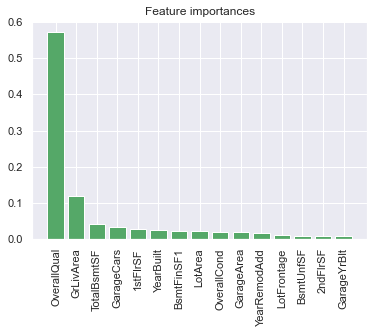

In [99]:
## Plotting the feature importances of the random forest regressor...
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(predictors)), values,color="g", align="center");
plt.xticks(range(len(predictors)), predictors, rotation=90);

---
---
# Conclusion

- Random Forest regressor is the most accurate model for predicting the house price. It scored an estimated accuracy of **85%**, out performing the regression models (linear, ridge, and lasso) by about 2%. 
- **Random Forest determined the overall quality of a home is by far the most important predictor**. 
- We can also make use of Boosting techniques to further optimize the solution model.


Machinel learning is an iterative process. This first round of data exploration and model evaluation served as a good start to quickly gain insights to get a first reasonably good model prototype. There is a lot of structure in this dataset and further optimization can even fetch a high performing prediction model.